## PROJECT - PREDICTION OF ACCEPTANCE OF ADMISSION INTO A UNIVERSITY

### Problem Statement:
To predict the Acceptance of Admission into a University using Machine Learning Algorithm called Multiple Linear Regression,Random Forest Regressor,Decision Tree Algorithm

### Aim of the project:
It is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This analysis should also help students who are currently preparing or will be preparing to get a better idea.

### Objective of the Project:
400 applicants have been surveyed as potential students for UCLA. The university weighs certain aspects of a student's education to determine their acceptance.

The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

### Importing the Libraries

In [1]:
import pandas as pd  #Importing the libraries which are needed.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Reading the Data Set

In [2]:
data = pd.read_csv("Admission_Predict.csv") #Data Loading
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [3]:
data=data.rename(columns={'Serial No.':'no','GRE Score':'gre','TOEFL Score':'toefl','University Rating':'rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'gpa','Research':'research','Chance of Admit':'chance'})

### Handling Missing Values

In [4]:
data.dropna()

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

In [5]:
data.fillna(0)

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

In [6]:
data.interpolate()

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

In [7]:
data.fillna(data.mean())

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

In [8]:
data.fillna(data.median())

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

### Exploratory Data Analysis:

### Data Description
The dataset contains information about a student's:

* GRE Score
* TOEFL Score
* University Ratings
* Statement of Purpose Score
* Letter of Recomendation Score
* CGPA
* Whether the Student Has Done Any Research
* Chance of Admission (What We're Trying to Predict)

In [9]:
data.dtypes

no            int64
gre           int64
toefl         int64
rating        int64
sop         float64
lor         float64
gpa         float64
research      int64
chance      float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   no        400 non-null    int64  
 1   gre       400 non-null    int64  
 2   toefl     400 non-null    int64  
 3   rating    400 non-null    int64  
 4   sop       400 non-null    float64
 5   lor       400 non-null    float64
 6   gpa       400 non-null    float64
 7   research  400 non-null    int64  
 8   chance    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
data.describe()

no         gre       toefl      rating         sop         lor  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   200.500000  316.807500  107.410000    3.087500    3.400000    3.452500   
std    115.614301   11.473646    6.069514    1.143728    1.006869    0.898478   
min      1.000000  290.000000   92.000000    1.000000    1.000000    1.000000   
25%    100.750000  308.000000  103.000000    2.000000    2.500000    3.000000   
50%    200.500000  317.000000  107.000000    3.000000    3.500000    3.500000   
75%    300.250000  325.000000  112.000000    4.000000    4.000000    4.000000   
max    400.000000  340.000000  120.000000    5.000000    5.000000    5.000000   

              gpa    research      chance  
count  400.000000  400.000000  400.000000  
mean     8.598925    0.547500    0.724350  
std      0.596317    0.498362    0.142609  
min      6.800000    0.000000    0.340000  
25%      8.170000    0.000000    0.640000  
50%      8.610000    1.000000    0.730000  
75%      9.062500    1.000000    0.830000  
max      9.920000    1.000000    0.970000

In [12]:
data.shape

(400, 9)

In [13]:
data.columns

Index(['no', 'gre', 'toefl', 'rating', 'sop', 'lor', 'gpa', 'research',
       'chance'],
      dtype='object')

In [14]:
data.nunique()

no          400
gre          49
toefl        29
rating        5
sop           9
lor           9
gpa         168
research      2
chance       60
dtype: int64

### Data Cleaning

In [15]:
data

no  gre  toefl  rating  sop  lor   gpa  research  chance
0      1  337    118       4  4.5  4.5  9.65         1    0.92
1      2  324    107       4  4.0  4.5  8.87         1    0.76
2      3  316    104       3  3.0  3.5  8.00         1    0.72
3      4  322    110       3  3.5  2.5  8.67         1    0.80
4      5  314    103       2  2.0  3.0  8.21         0    0.65
..   ...  ...    ...     ...  ...  ...   ...       ...     ...
395  396  324    110       3  3.5  3.5  9.04         1    0.82
396  397  325    107       3  3.0  3.5  9.11         1    0.84
397  398  330    116       4  5.0  4.5  9.45         1    0.91
398  399  312    103       3  3.5  4.0  8.78         0    0.67
399  400  333    117       4  5.0  4.0  9.66         1    0.95

[400 rows x 9 columns]

In [16]:
data = data.drop("no", axis=1) #dropping the  serial number column as it does not have any value for the prediction
data.head()

gre  toefl  rating  sop  lor   gpa  research  chance
0  337    118       4  4.5  4.5  9.65         1    0.92
1  324    107       4  4.0  4.5  8.87         1    0.76
2  316    104       3  3.0  3.5  8.00         1    0.72
3  322    110       3  3.5  2.5  8.67         1    0.80
4  314    103       2  2.0  3.0  8.21         0    0.65

In [17]:
data.isnull().sum() #There are no missing values in the data.

gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

In [18]:
data.head()

gre  toefl  rating  sop  lor   gpa  research  chance
0  337    118       4  4.5  4.5  9.65         1    0.92
1  324    107       4  4.0  4.5  8.87         1    0.76
2  316    104       3  3.0  3.5  8.00         1    0.72
3  322    110       3  3.5  2.5  8.67         1    0.80
4  314    103       2  2.0  3.0  8.21         0    0.65

### Data Visualization

In [19]:
data.groupby('rating').mean()

gre       toefl       sop       lor       gpa  research  \
rating                                                                   
1       303.153846   99.076923  1.884615  2.211538  7.745769  0.192308   
2       309.177570  103.523364  2.705607  2.925234  8.183738  0.299065   
3       315.954887  106.887218  3.364662  3.402256  8.552256  0.533835   
4       324.824324  111.824324  4.108108  4.006757  9.021622  0.797297   
5       328.333333  113.666667  4.500000  4.358333  9.291167  0.866667   

          chance  
rating            
1       0.548077  
2       0.625981  
3       0.711880  
4       0.818108  
5       0.888167

#### Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings. Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [20]:
data[data['chance']>0.82].groupby('chance').mean()

gre       toefl    rating       sop       lor       gpa  \
chance                                                                   
0.83    326.000000  112.666667  3.666667  3.833333  4.166667  9.120000   
0.84    324.000000  109.444444  3.444444  3.777778  3.555556  9.038889   
0.85    322.000000  111.500000  3.666667  4.083333  4.166667  9.041667   
0.86    325.500000  114.750000  4.250000  4.312500  4.437500  9.107500   
0.87    326.400000  111.400000  4.400000  4.400000  4.200000  9.072000   
0.88    323.000000  110.750000  5.000000  4.875000  4.500000  9.152500   
0.89    329.111111  113.666667  4.444444  4.333333  4.166667  9.263333   
0.90    331.000000  116.125000  4.000000  4.562500  4.062500  9.305000   
0.91    331.714286  114.857143  4.428571  4.285714  4.428571  9.358571   
0.92    329.833333  115.666667  4.833333  4.500000  4.333333  9.368333   
0.93    331.333333  115.222222  4.666667  4.500000  4.166667  9.433333   
0.94    334.250000  116.500000  4.833333  4.708333  4.833333  9.532500   
0.95    335.250000  118.750000  4.250000  4.875000  4.375000  9.660000   
0.96    337.428571  115.857143  4.571429  4.714286  4.642857  9.737143   
0.97    337.500000  119.750000  4.750000  4.250000  4.250000  9.875000   

        research  
chance            
0.83    0.666667  
0.84    1.000000  
0.85    0.833333  
0.86    0.875000  
0.87    0.800000  
0.88    1.000000  
0.89    0.888889  
0.90    1.000000  
0.91    1.000000  
0.92    1.000000  
0.93    1.000000  
0.94    1.000000  
0.95    1.000000  
0.96    1.000000  
0.97    1.000000

### Histogram of Admission Chance
#### Let us visualize our data to get a much clearer picture of the data and the significant features.

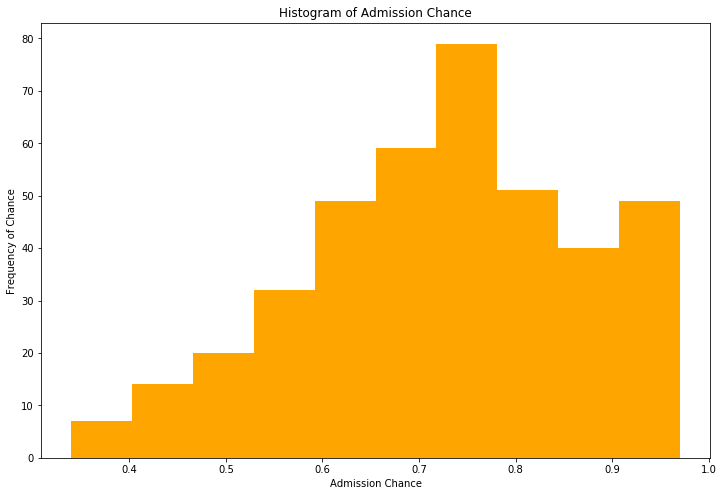

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(data['chance'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

#### Histogram shows us that 'chance of admission' column is well distributed in data.

## Line Plot for Research Output and The Chance of Admission

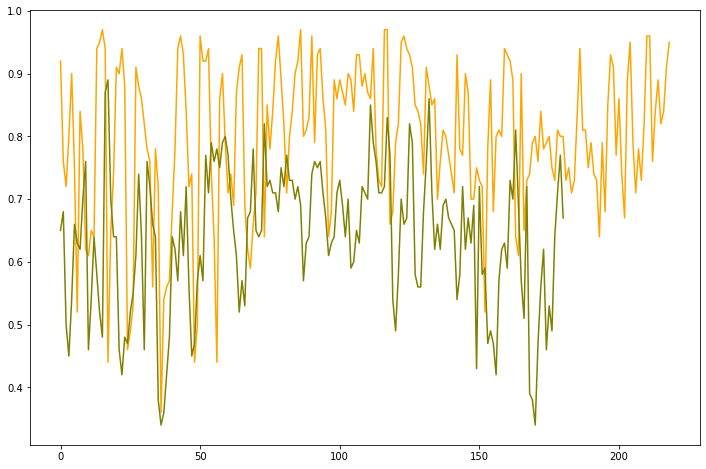

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(len(data[data['research']==1])), data[data['research']==1]['chance'], color='orange')
plt.plot(range(len(data[data['research']==0])), data[data['research']==0]['chance'], color='olive')
plt.show()

#### The chance of admission depends a great deal on the subjects' research output; hence, research can be a good predictor in predicting the outcome.

## Scatter Plot of University Rating and The Chance of Admission

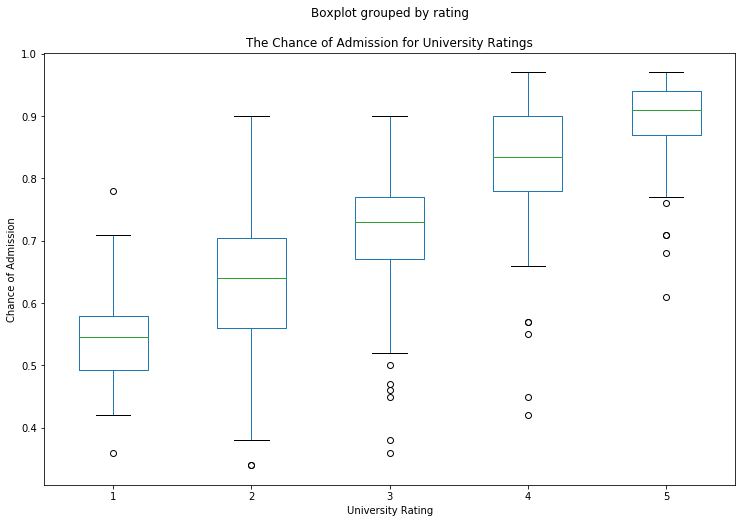

In [23]:
data.boxplot(column='chance',by='rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

#### As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

## Histogram of Numeric Variables

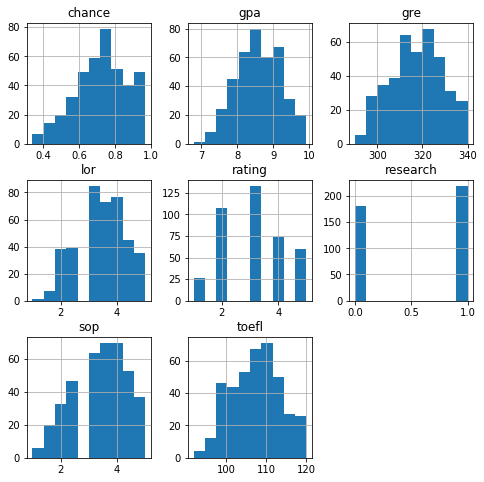

In [24]:
data.hist(bins=10, figsize=(8,8))
plt.show()

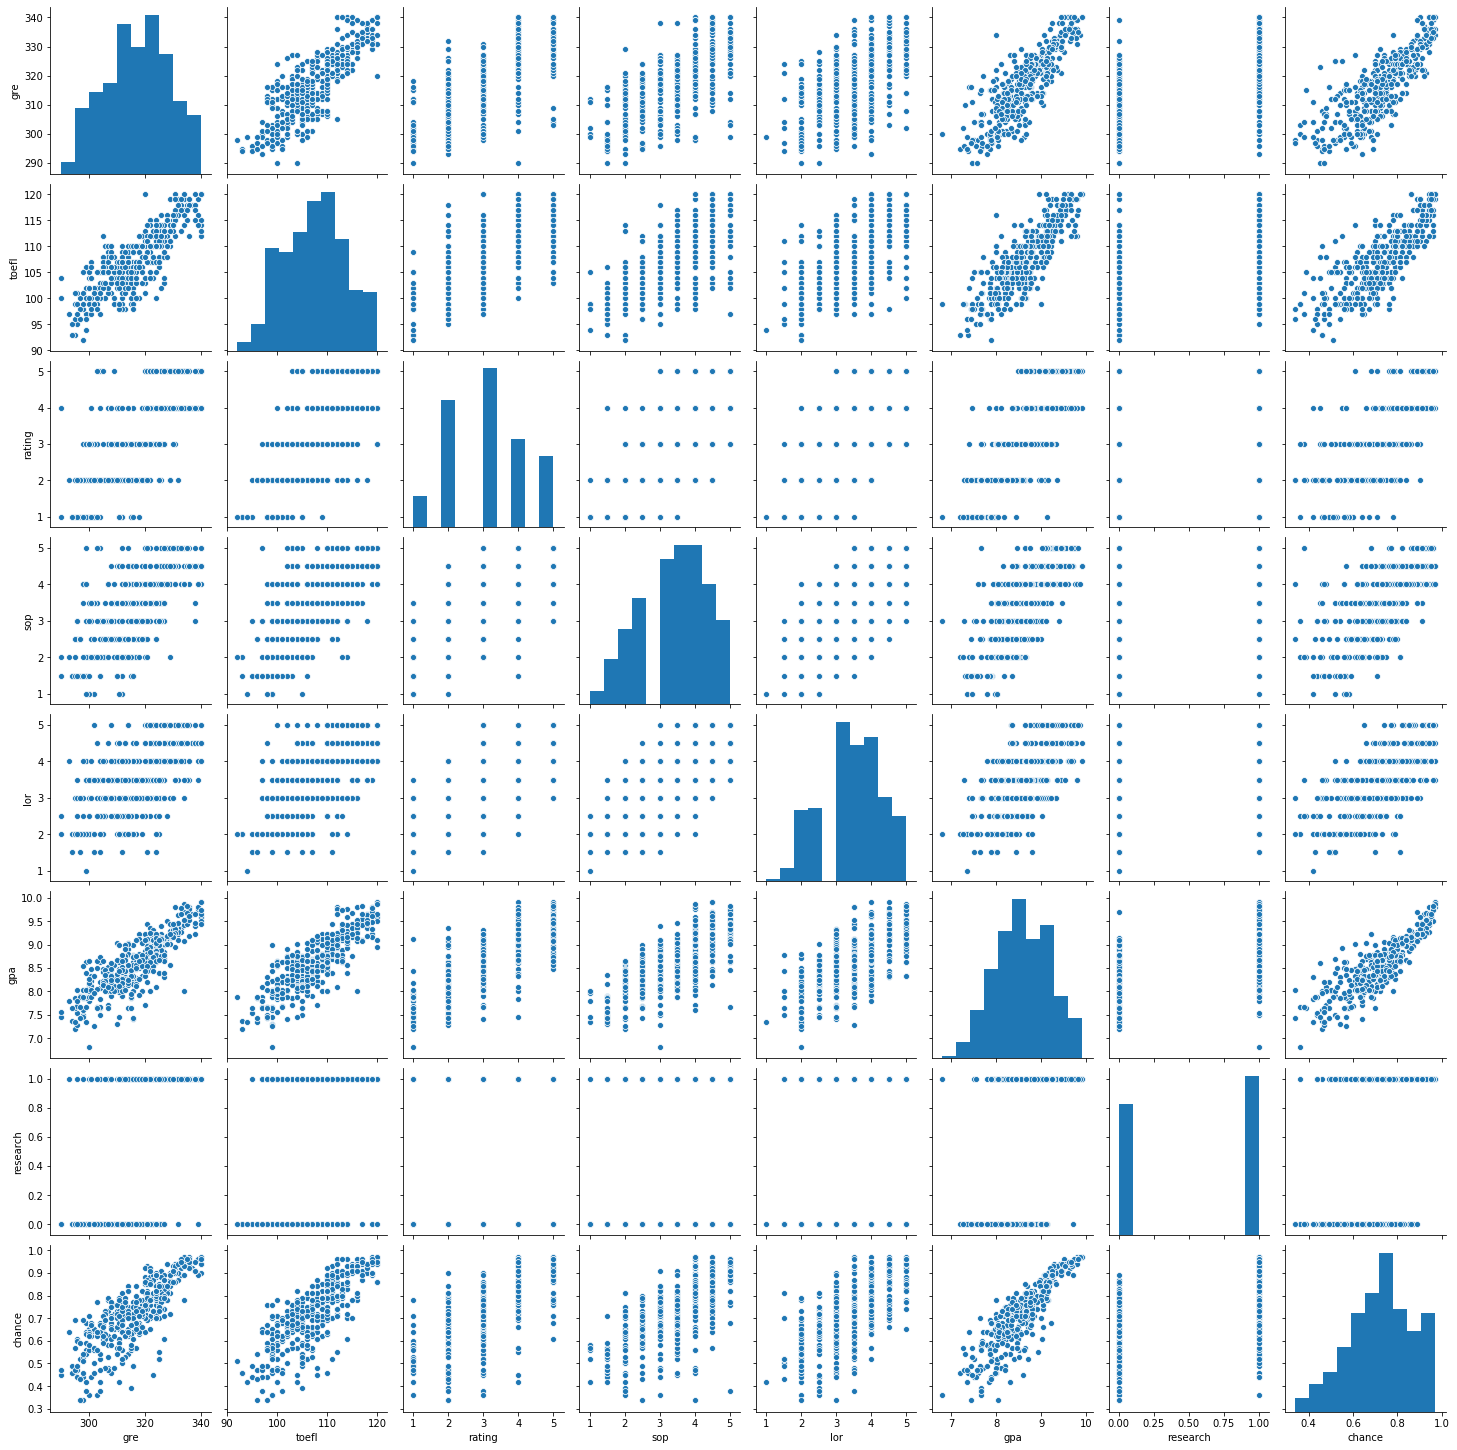

In [25]:
sns.pairplot(data)

In [26]:
corelation = data.corr()

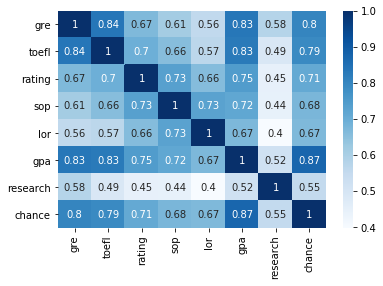

In [27]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap='Blues')

### The top three features that affect the Chance to Admit are:

1. CGPA
2. GRE Score
3. TOEFL Score

### CGPA
The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

### CGPA vs Chance of Admit
It appears as applicant's CGPA has a strong correlation with their chance of admission.

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

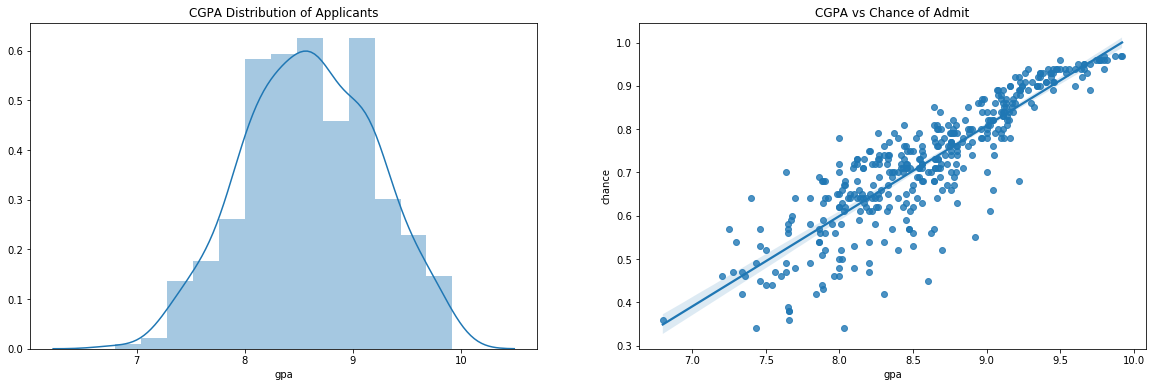

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['gpa'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['gpa'], data['chance'])
plt.title('CGPA vs Chance of Admit')

### GRE Score
The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

1. Analytical Writing (Scored on a 0-6 scale in half-point increments)
2. Verbal Reasoning (Scored on a 130-170 scale)
3. Quantitative Reasoning (Scored on a 130-170 scale)

In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

### GRE Score vs Chance of Admit
GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

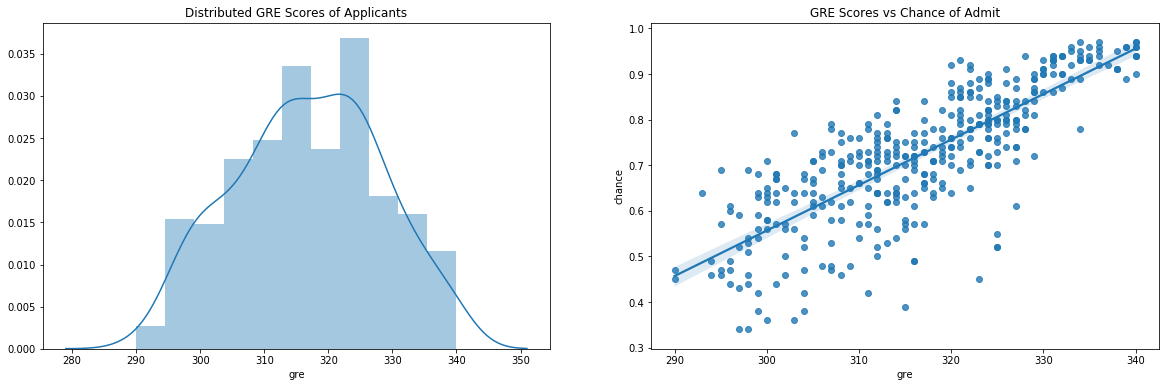

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['gre'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['gre'], data['chance'])
plt.title('GRE Scores vs Chance of Admit')

### TOEFL Score
The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

1. Reading
2. Listening
3. Speaking
4. Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

### TOEFL Score vs Chance of Admit
Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

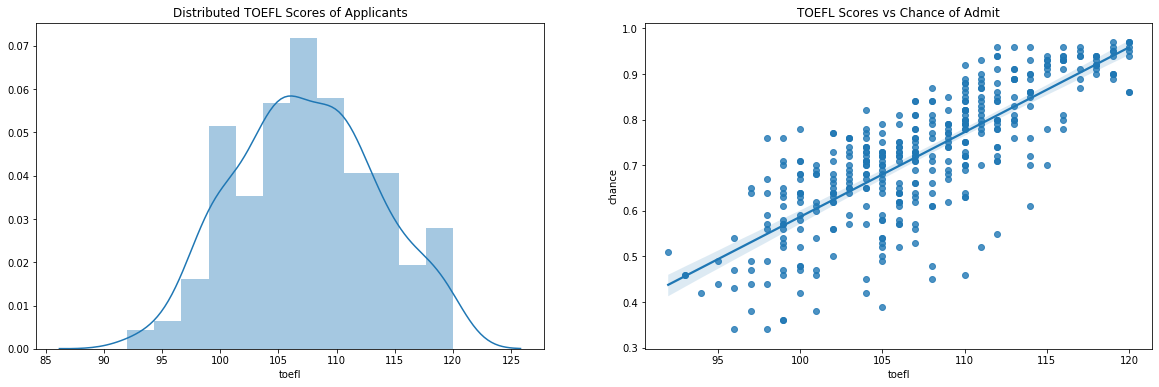

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['toefl'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(data['toefl'], data['chance'])
plt.title('TOEFL Scores vs Chance of Admit')

### Research
Let's explore how many applicants have research experience.

It seems the majority of applicants have research experience. However, this is the least important feature, so it doesn't matter all too much if an applicant has the experience or not.

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

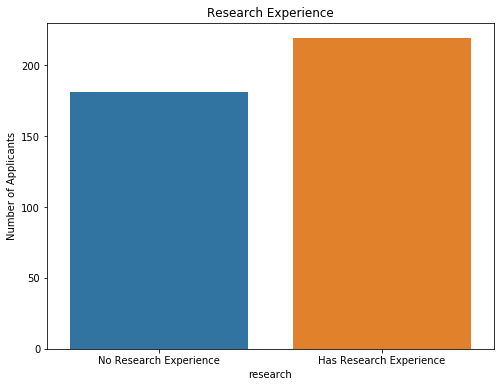

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

### University Rating
Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

Text(0, 0.5, 'Number of Applicants')

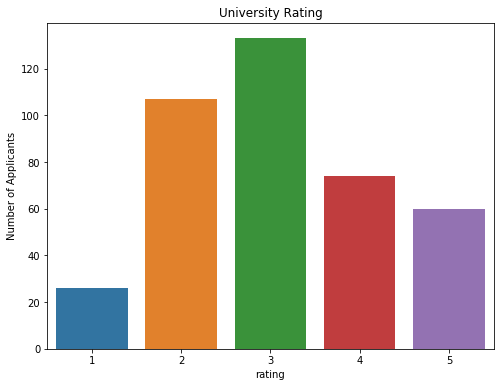

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [33]:
X=data[['gpa']]
Y=data['chance']

## Train Test Split

### Data will be splitted using train_test_split module of scikitlearn library where splitting ratio is chosen as 20% for test data.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)
(320,)
(80,)


In [37]:
X_train

gpa
3    8.67
18   8.80
202  9.91
250  8.57
274  7.95
..    ...
71   9.76
106  9.18
270  8.22
348  7.25
102  8.25

[320 rows x 1 columns]

In [38]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: chance, Length: 320, dtype: float64

In [39]:
X_test

gpa
209  8.12
280  8.64
33   9.60
210  9.06
93   7.88
..    ...
246  8.73
227  8.53
369  8.03
176  9.16
289  9.00

[80 rows x 1 columns]

In [40]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: chance, Length: 80, dtype: float64

## Data normalization is important in order to represent data in comparable scales.

In [41]:
from sklearn.preprocessing import MinMaxScaler
xs=MinMaxScaler()
X_train[X_train.columns] = xs.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = xs.transform(X_test[X_test.columns])

C:\Users\jsvgp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jsvgp\anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\jsvgp\anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

## Classification Models & Furher Analysis

#### In order to make classification models, outcome of the classification is defined as 'status' which takes value of True for the applicants that have more than 82% chance. Third quartile, 82%, is chosen as threshold since median of the chance data, 72%, is pretty high.

In [42]:
import numpy as np
cy_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(cy_test)

### Machine Learning 
Now we'll implement machine learning algorithms to predict the chance of admission. We'll use multiple techniques and eventually select the method with the best score. The methods used will be:

* Linear Regression
* Decision Trees
* Random Forests

## Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)
(320,)
(80,)


In [45]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test,y_pred))

0.7806138920790952


In [46]:
pred=clf.predict(X_test)
pred

array([0.63018303, 0.73589007, 0.93104153, 0.82126883, 0.58139516,
       0.90054912, 0.58342799, 0.53667295, 0.69726634, 0.87412236,
       0.72775876, 0.91884457, 0.48381943, 0.90054912, 0.71962745,
       0.70743048, 0.70539765, 0.48991791, 0.67287241, 0.97576374,
       0.6505113 , 0.66677393, 0.7379229 , 0.57732951, 0.94120567,
       0.83143297, 0.69726634, 0.61188758, 0.67897089, 0.81923601,
       0.81720318, 0.91681174, 0.62408454, 0.52447598, 0.66067544,
       0.73182441, 0.71962745, 0.65457696, 0.63424868, 0.88225367,
       0.74198855, 0.54480426, 0.75215269, 0.93104153, 0.85379408,
       0.83956428, 0.97169809, 0.69116786, 0.91071326, 0.85582691,
       0.8700567 , 0.69523351, 0.75621835, 0.93917284, 0.53464012,
       0.54480426, 0.69726634, 0.83549863, 0.62611737, 0.82126883,
       0.701332  , 0.67083958, 0.68100372, 0.51227902, 0.63018303,
       0.66677393, 0.61798606, 0.83753146, 0.85582691, 0.81720318,
       0.70743048, 0.83956428, 0.87818801, 0.82940015, 0.56513

In [47]:
np.mean(pred)

0.73657614913454

In [48]:
np.mean(y_test)

0.720625

In [49]:
print(clf.intercept_)
print(clf.coef_)

-1.0204730982355816
[0.20328277]


### Computing the metrics for mean absolute error, mean squared error, root mean squared eroor, and R-squared, and put them into a DataFrame.

In [50]:
## Test the model on testing data
y_pred = clf.predict(X_test)  # test data--> unseen data
y_pred
## We need to compare the actual values(y_test) and the predicted
                                                       #values(y_test_pred)
   
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:', r2_score(y_test,y_pred))

print('Adjusted R^2:', 1- (1-r2_score(y_test, y_pred))*(len(X_test)-1)/
                                 (len(X_test)-X_test.shape[1]-1))


print('MAE:', mean_absolute_error(y_test, y_pred))

print('MSE:', mean_squared_error(y_test, y_pred))

R^2: 0.7806138920790952
Adjusted R^2: 0.7778012496698528
MAE: 0.05369334636146487
MSE: 0.0056652863067240605


### Linear Regression Accuracy

In [51]:
#Linear Regression Accuracy
clf_score = (clf.score(X_test,y_test))*100
clf_score

78.06138920790951

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)


y_train_pred=dtree.predict(X_train)
y_train_pred


y_test_pred=dtree.predict(X_test)
y_test_pred


## We need to compare the actual values(y_test) and the predicted
                                                        #values(y_test_pred)

array([0.72666667, 0.738     , 0.95      , 0.89      , 0.595     ,
       0.9       , 0.63333333, 0.38      , 0.68      , 0.91      ,
       0.7       , 0.94      , 0.49      , 0.9       , 0.708     ,
       0.61666667, 0.69      , 0.49      , 0.68333333, 0.955     ,
       0.665     , 0.59      , 0.735     , 0.6       , 0.94666667,
       0.842     , 0.68      , 0.34      , 0.63      , 0.74666667,
       0.74666667, 0.96      , 0.57666667, 0.47      , 0.7075    ,
       0.7       , 0.708     , 0.68      , 0.64      , 0.92666667,
       0.75      , 0.6       , 0.67      , 0.95      , 0.785     ,
       0.815     , 0.955     , 0.73      , 0.96      , 0.895     ,
       0.91      , 0.785     , 0.76      , 0.94666667, 0.57      ,
       0.6       , 0.68      , 0.86      , 0.57666667, 0.89      ,
       0.57      , 0.72      , 0.7       , 0.47      , 0.72666667,
       0.59      , 0.645     , 0.815     , 0.895     , 0.74666667,
       0.61666667, 0.815     , 0.9       , 0.82      , 0.61   

### Decision Tree Accuracy

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R^2:', r2_score(y_test,y_test_pred))

print('Adjusted R^2:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))


print('MAE:', mean_absolute_error(y_test, y_test_pred))

print('MSE:', mean_squared_error(y_test, y_test_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))



dtree_score = (dtree.score(X_test, y_test))*100
dtree_score

R^2: 0.6793909879856168
Adjusted R^2: 0.6752806160367144
MAE: 0.06349791666666667
MSE: 0.008279201736111108
RMSE 0.09099011889271882


67.93909879856169

## Random Forest

#### I have used random forest algorithm for solving this regression problem. The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

#### n_estimators is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [55]:
rf = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [56]:
from sklearn import metrics
print('MAE:', mean_absolute_error(y_test, y_pred))

print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.06130149607683981
MSE: 0.0068883014827861595
RMSE 0.08299579195830449


### Random Forest Accuracy

In [57]:
#Random forest accuracy
rf_score = (rf.score(X_test, y_test))*100
rf_score

73.32530836613445

## Comparing the Accuracy of Linear Regression,Decision Tree,Random Forest

Text(0, 0.5, 'Accuracy')

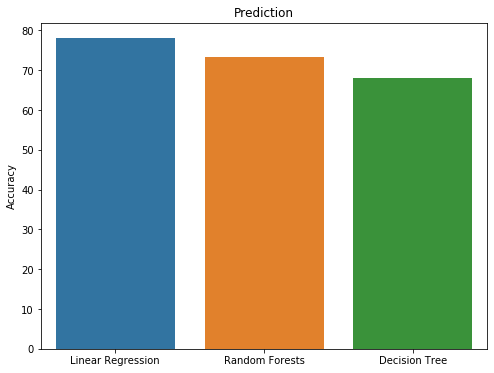

In [58]:
#Comparing Scores
Methods = ['Linear Regression','Random Forests','Decision Tree']
scores = np.array([clf_score, rf_score, dtree_score])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods,scores)
plt.title('Prediction')
plt.ylabel('Accuracy')

### Selecting the Best Algorithm
* Linear Regression - 78.06%
* Random Forests - 73.32%
* Decision Trees - 67.93%

It seems that Linear Regression is the most accurate of the 3 methods and will be used to predict the future applicant's chances of admission.

### Conclusion
Clearly CGPA is the most important criteria for graduate admission followed by GRE and TOEFL score.

Among the three algorithms, Linear Regression gives the best Accuracy.

As a quick summary, I used multiple linear regression algorithm , random forest algorithm and decision tree algorithm to visualize the importance of each features for graduate admission. This could be of great help for students preparing for their higher studies.
